In [19]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.utils import AirPassengersDF
import matplotlib.pyplot as plt

df = AirPassengersDF
sf = StatsForecast(
    models=[AutoARIMA(season_length=12)],
    freq='ME',
)

sf.fit(df)
sf.predict(h=12, level=[95])

,unique_id,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95
0,1.0,1961-01-31,444.309575,421.279342,467.339808
1,1.0,1961-02-28,418.213738,390.227635,446.199842
2,1.0,1961-03-31,446.243407,412.910032,479.576782
3,1.0,1961-04-30,488.234223,450.621361,525.847084
4,1.0,1961-05-31,499.237066,457.694834,540.779298
5,1.0,1961-06-30,562.236186,517.130961,607.341411
6,1.0,1961-07-31,649.236458,600.822427,697.650489
7,1.0,1961-08-31,633.236374,581.727786,684.744962
8,1.0,1961-09-30,535.236400,480.808289,589.664511
9,1.0,1961-10-31,488.236392,431.037766,545.435017


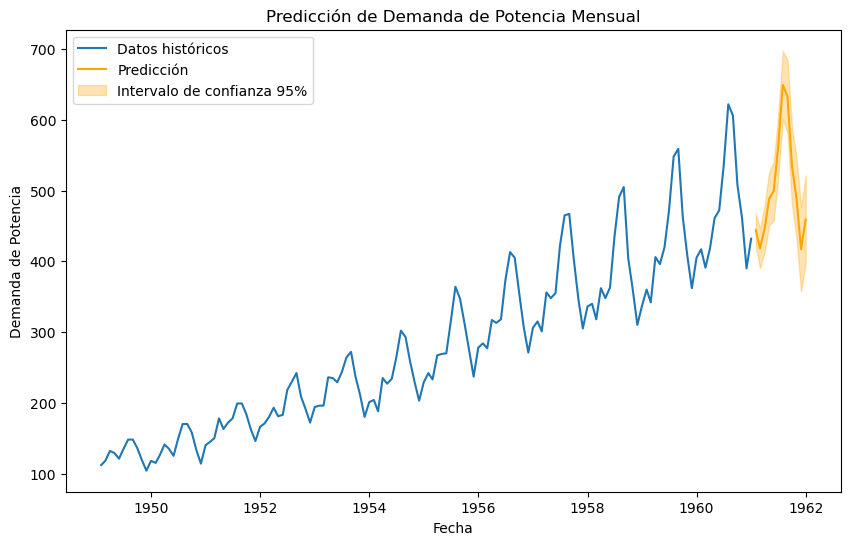

In [20]:
# Realizar la predicción
forecast = sf.predict(h=12, level=[95])

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Datos históricos')
plt.plot(forecast['ds'], forecast['AutoARIMA'], label='Predicción', color='orange')
plt.fill_between(forecast['ds'], forecast['AutoARIMA-lo-95'], forecast['AutoARIMA-hi-95'], color='orange', alpha=0.3, label='Intervalo de confianza 95%')
plt.xlabel('Fecha')
plt.ylabel('Demanda de Potencia')
plt.title('Predicción de Demanda de Potencia Mensual')
plt.legend()
plt.show()

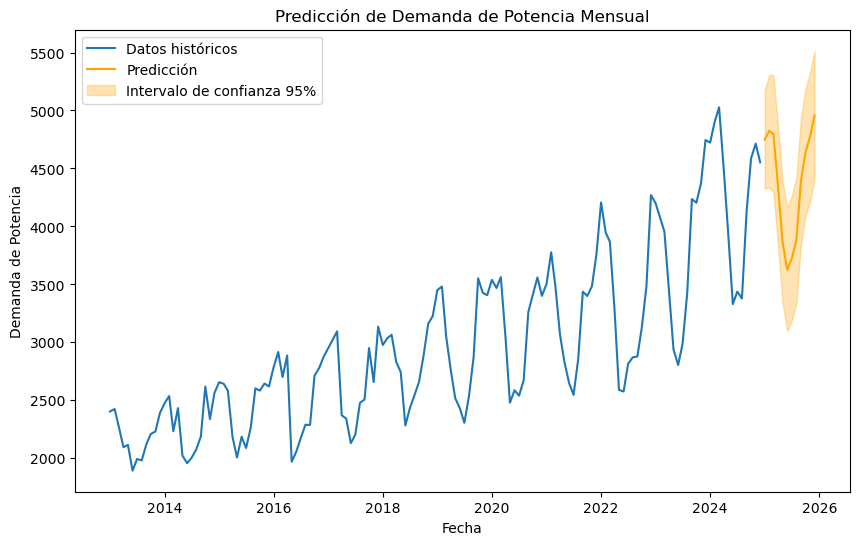

In [21]:
import pandas as pd
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
import matplotlib.pyplot as plt

# Cargar y transformar los datos
df2 = pd.read_excel('demanda2.xlsx')

meses_es_en = {
    'Enero': 'January', 'Febrero': 'February', 'Marzo': 'March', 'Abril': 'April',
    'Mayo': 'May', 'Junio': 'June', 'Julio': 'July', 'Agosto': 'August',
    'Septiembre': 'September', 'Octubre': 'October', 'Noviembre': 'November', 'Diciembre': 'December'
}

df_melted = df2.melt(id_vars=['Año'], var_name='Mes', value_name='y')
df_melted['Mes'] = df_melted['Mes'].map(meses_es_en)
df_melted['ds'] = pd.to_datetime(df_melted['Año'].astype(str) + '-' + df_melted['Mes'], format='%Y-%B')
df_final = df_melted[['ds', 'y']].sort_values('ds').reset_index(drop=True)

# Agregar columna unique_id
df_final['unique_id'] = 1

# Crear y entrenar el modelo
sf = StatsForecast(
    models=[AutoARIMA(season_length=12)],
    freq='ME',
)

sf.fit(df_final)
forecast = sf.predict(h=12, level=[95])

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(df_final['ds'], df_final['y'], label='Datos históricos')
plt.plot(forecast['ds'], forecast['AutoARIMA'], label='Predicción', color='orange')
plt.fill_between(forecast['ds'], forecast['AutoARIMA-lo-95'], forecast['AutoARIMA-hi-95'], color='orange', alpha=0.3, label='Intervalo de confianza 95%')
plt.xlabel('Fecha')
plt.ylabel('Demanda de Potencia')
plt.title('Predicción de Demanda de Potencia Mensual')
plt.legend()
plt.show()